# Revisão Aula 1

In [41]:
import tensorflow as tf
import pandas as pd
BATCH_SIZE = 16
print(tf.__version__)
print(tf.test.is_gpu_available())

2.8.0
False


In [42]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [43]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [44]:
X = data.drop(columns="target")
y = data.target

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=404)
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (922, 13)
y_train shape:  (922,)
X_test shape:  (103, 13)
y_test shape:  (103,)


In [46]:
from keras import layers
import keras

In [47]:
model = keras.Sequential()

model.add(keras.layers.Dense( 32, input_dim = X_train.shape[1], activation = 'tanh'))

model.add(keras.layers.Dense( 16, activation = 'relu'))

model.add(keras.layers.Dense( 1, activation = 'sigmoid'))

model.summary()

model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 32)                448       
                                                                 
 dense_17 (Dense)            (None, 16)                528       
                                                                 
 dense_18 (Dense)            (None, 1)                 17        
                                                                 
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________


In [48]:
history = model.fit(x = X_train, y = y_train, batch_size = BATCH_SIZE, epochs = 30, validation_split = 0.2)

Epoch 1/30
47/47 [==============================] - 1s 4ms/step - loss: 0.6529 - accuracy: 0.6255 - val_loss: 0.6545 - val_accuracy: 0.6054
Epoch 2/30
47/47 [==============================] - 0s 2ms/step - loss: 0.5925 - accuracy: 0.6988 - val_loss: 0.6357 - val_accuracy: 0.6324
Epoch 3/30
47/47 [==============================] - 0s 2ms/step - loss: 0.5667 - accuracy: 0.7015 - val_loss: 0.6407 - val_accuracy: 0.6595
Epoch 4/30
47/47 [==============================] - 0s 2ms/step - loss: 0.5588 - accuracy: 0.7083 - val_loss: 0.6237 - val_accuracy: 0.6162
Epoch 5/30
47/47 [==============================] - 0s 2ms/step - loss: 0.5452 - accuracy: 0.7191 - val_loss: 0.6219 - val_accuracy: 0.6486
Epoch 6/30
47/47 [==============================] - 0s 2ms/step - loss: 0.5519 - accuracy: 0.7164 - val_loss: 0.6067 - val_accuracy: 0.6541
Epoch 7/30
47/47 [==============================] - 0s 2ms/step - loss: 0.5440 - accuracy: 0.7218 - val_loss: 0.6369 - val_accuracy: 0.6757
Epoch 8/30
47/47 [==

In [49]:
model2 = keras.Sequential()

model2.add(keras.layers.Dense( 64, input_dim = X_train.shape[1], activation = 'tanh'))

model2.add(keras.layers.Dense( 32, activation = 'relu'))

model2.add(keras.layers.Dense( 4, activation = 'relu'))

model2.add(keras.layers.Dense( 1, activation = 'sigmoid'))

model2.summary()

model2.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 64)                896       
                                                                 
 dense_20 (Dense)            (None, 32)                2080      
                                                                 
 dense_21 (Dense)            (None, 4)                 132       
                                                                 
 dense_22 (Dense)            (None, 1)                 5         
                                                                 
Total params: 3,113
Trainable params: 3,113
Non-trainable params: 0
_________________________________________________________________


In [50]:
history2 = model2.fit(x = X_train, y = y_train, batch_size = BATCH_SIZE, epochs = 30, validation_split = 0.2)

Epoch 1/30
47/47 [==============================] - 1s 5ms/step - loss: 0.6986 - accuracy: 0.5848 - val_loss: 0.6771 - val_accuracy: 0.6541
Epoch 2/30
47/47 [==============================] - 0s 2ms/step - loss: 0.6507 - accuracy: 0.6499 - val_loss: 0.6678 - val_accuracy: 0.6432
Epoch 3/30
47/47 [==============================] - 0s 2ms/step - loss: 0.6358 - accuracy: 0.6839 - val_loss: 0.6649 - val_accuracy: 0.6432
Epoch 4/30
47/47 [==============================] - 0s 2ms/step - loss: 0.6229 - accuracy: 0.6879 - val_loss: 0.6396 - val_accuracy: 0.6324
Epoch 5/30
47/47 [==============================] - 0s 2ms/step - loss: 0.6111 - accuracy: 0.6608 - val_loss: 0.6435 - val_accuracy: 0.6324
Epoch 6/30
47/47 [==============================] - 0s 2ms/step - loss: 0.5989 - accuracy: 0.6784 - val_loss: 0.6377 - val_accuracy: 0.6486
Epoch 7/30
47/47 [==============================] - 0s 2ms/step - loss: 0.5802 - accuracy: 0.6866 - val_loss: 0.6150 - val_accuracy: 0.6432
Epoch 8/30
47/47 [==

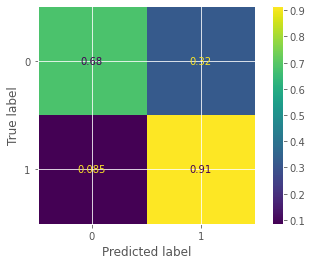

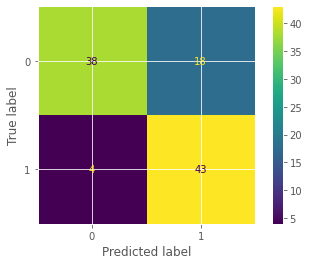

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = model2.predict(X_test)
predict_class = predictions > 0.5

cm = confusion_matrix(y_test, predict_class, labels=np.array([0,1]), normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.array([0,1]))
disp.plot()
plt.show()

cm = confusion_matrix(y_test, predict_class, labels=np.array([0,1]))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.array([0,1]))
disp.plot()
plt.show()

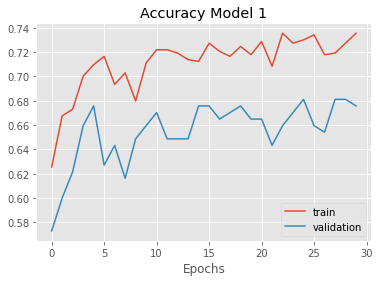

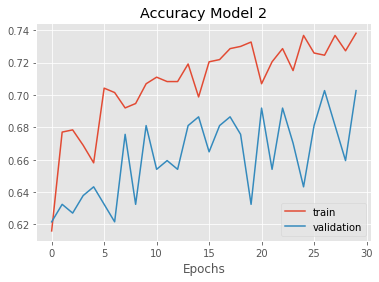

In [11]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(history.history['accuracy'], label="train")
plt.plot(history.history['val_accuracy'], label="validation")
plt.xlabel("Epochs")
plt.legend(loc="lower right")
plt.title("Accuracy Model 1")
plt.show()

plt.style.use('ggplot')
plt.plot(history2.history['accuracy'], label="train")
plt.plot(history2.history['val_accuracy'], label="validation")
plt.xlabel("Epochs")
plt.legend(loc="lower right")
plt.title("Accuracy Model 2")
plt.show()

In [12]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 1ms/step - loss: 0.5446 - accuracy: 0.7184


[0.5446414351463318, 0.7184466123580933]

In [13]:
model2.evaluate(X_test, y_test)

4/4 [==============================] - 0s 1ms/step - loss: 0.5422 - accuracy: 0.7282


[0.5421738624572754, 0.7281553149223328]

In [14]:
data = pd.read_csv("drug200.csv")
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [15]:
data.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [16]:
data.Drug = data.Drug.replace({"drugY": 0.0, "drugX": 1.0, "drugA": 2.0, "drugB": 3.0, "drugC": 4.0})

In [17]:
data.Sex = data.Sex.replace({"F": 0, "M": 1})
data.BP = data.BP.replace({"HIGH": 0, "LOW": 1, "NORMAL": 2})
data.Cholesterol = data.Cholesterol.replace({"HIGH": 0, "LOW": 1, "NORMAL": 2})

In [18]:
X = data.drop(columns="Drug")
y = data.Drug

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=404)
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (180, 5)
y_train shape:  (180,)
X_test shape:  (20, 5)
y_test shape:  (20,)


In [33]:
model3 = keras.Sequential()

model3.add(keras.layers.Dense( 64, input_dim = X_train.shape[1], activation = 'tanh'))

model3.add(keras.layers.Dense( 32, activation = 'relu'))

model3.add(keras.layers.Dense( 5, activation = 'softmax'))

model3.summary()

model3.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

history3 = model3.fit(x = X_train, y = y_train, batch_size = BATCH_SIZE, epochs = 200, validation_split = 0.2)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 64)                384       
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 5)                 165       
                                                                 
Total params: 2,629
Trainable params: 2,629
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
9/9 [==============================] - 0s 18ms/step - loss: 2.0229 - accuracy: 0.1806 - val_loss: 1.4477 - val_accuracy: 0.3611
Epoch 2/200
9/9 [==============================] - 0s 4ms/step - loss: 1.3490 - accuracy: 0.4792 - val_loss: 1.2882 - val_accuracy: 0.5000
Epoch 3/200
9/9 [====================

Epoch 54/200
9/9 [==============================] - 0s 4ms/step - loss: 0.4253 - accuracy: 0.8472 - val_loss: 0.5807 - val_accuracy: 0.8056
Epoch 55/200
9/9 [==============================] - 0s 4ms/step - loss: 0.4138 - accuracy: 0.8333 - val_loss: 0.5446 - val_accuracy: 0.8056
Epoch 56/200
9/9 [==============================] - 0s 4ms/step - loss: 0.3942 - accuracy: 0.8611 - val_loss: 0.5443 - val_accuracy: 0.7778
Epoch 57/200
9/9 [==============================] - 0s 4ms/step - loss: 0.3974 - accuracy: 0.8542 - val_loss: 0.5318 - val_accuracy: 0.8333
Epoch 58/200
9/9 [==============================] - 0s 4ms/step - loss: 0.3905 - accuracy: 0.8611 - val_loss: 0.5320 - val_accuracy: 0.8056
Epoch 59/200
9/9 [==============================] - 0s 4ms/step - loss: 0.3774 - accuracy: 0.8611 - val_loss: 0.5313 - val_accuracy: 0.8056
Epoch 60/200
9/9 [==============================] - 0s 4ms/step - loss: 0.3787 - accuracy: 0.8472 - val_loss: 0.4964 - val_accuracy: 0.8611
Epoch 61/200
9/9 [==

9/9 [==============================] - 0s 4ms/step - loss: 0.1742 - accuracy: 0.9514 - val_loss: 0.3042 - val_accuracy: 0.9167
Epoch 113/200
9/9 [==============================] - 0s 4ms/step - loss: 0.1695 - accuracy: 0.9583 - val_loss: 0.3022 - val_accuracy: 0.9167
Epoch 114/200
9/9 [==============================] - 0s 4ms/step - loss: 0.1710 - accuracy: 0.9583 - val_loss: 0.3206 - val_accuracy: 0.9167
Epoch 115/200
9/9 [==============================] - 0s 4ms/step - loss: 0.1705 - accuracy: 0.9375 - val_loss: 0.2866 - val_accuracy: 0.9444
Epoch 116/200
9/9 [==============================] - 0s 4ms/step - loss: 0.1662 - accuracy: 0.9583 - val_loss: 0.3143 - val_accuracy: 0.9444
Epoch 117/200
9/9 [==============================] - 0s 4ms/step - loss: 0.1712 - accuracy: 0.9444 - val_loss: 0.3015 - val_accuracy: 0.9167
Epoch 118/200
9/9 [==============================] - 0s 4ms/step - loss: 0.1685 - accuracy: 0.9444 - val_loss: 0.2956 - val_accuracy: 0.9444
Epoch 119/200
9/9 [========

9/9 [==============================] - 0s 4ms/step - loss: 0.1095 - accuracy: 0.9722 - val_loss: 0.2946 - val_accuracy: 0.9444
Epoch 171/200
9/9 [==============================] - 0s 4ms/step - loss: 0.1088 - accuracy: 0.9514 - val_loss: 0.2844 - val_accuracy: 0.9167
Epoch 172/200
9/9 [==============================] - 0s 4ms/step - loss: 0.1148 - accuracy: 0.9722 - val_loss: 0.2795 - val_accuracy: 0.9444
Epoch 173/200
9/9 [==============================] - 0s 4ms/step - loss: 0.1250 - accuracy: 0.9444 - val_loss: 0.2988 - val_accuracy: 0.9444
Epoch 174/200
9/9 [==============================] - 0s 4ms/step - loss: 0.1099 - accuracy: 0.9653 - val_loss: 0.2986 - val_accuracy: 0.9444
Epoch 175/200
9/9 [==============================] - 0s 4ms/step - loss: 0.1189 - accuracy: 0.9444 - val_loss: 0.2811 - val_accuracy: 0.9722
Epoch 176/200
9/9 [==============================] - 0s 4ms/step - loss: 0.1003 - accuracy: 0.9583 - val_loss: 0.2751 - val_accuracy: 0.9444
Epoch 177/200
9/9 [========

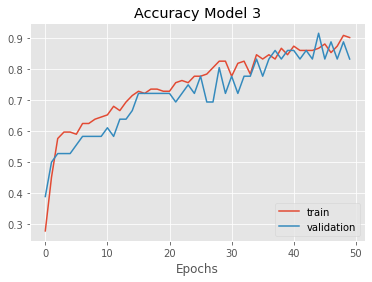

In [24]:
plt.style.use('ggplot')
plt.plot(history3.history['accuracy'], label="train")
plt.plot(history3.history['val_accuracy'], label="validation")
plt.xlabel("Epochs")
plt.legend(loc="lower right")
plt.title("Accuracy Model 3")
plt.show()

In [21]:
model3.evaluate(X_test, y_test)

1/1 [==============================] - 0s 18ms/step - loss: 0.5687 - accuracy: 0.8500


[0.568718433380127, 0.8500000238418579]

# Aula 2

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = model3.predict(X_test)

In [ ]:
for p in predictions 